In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

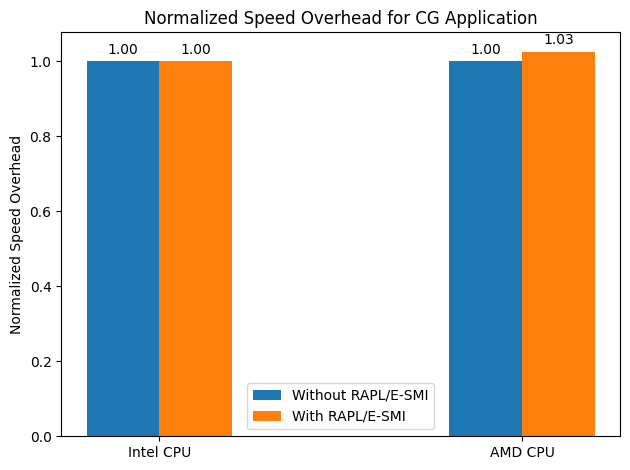

In [3]:

intel_times = [10.6, 10.61]  # Intel CPU, with and without RAPL
amd_times = [7.8, 8.0]       # AMD CPU, with and without E-SMI

# Normalize the times (assuming the first value is the baseline for each CPU)
intel_normalized = [time / intel_times[0] for time in intel_times]
amd_normalized = [time / amd_times[0] for time in amd_times]

# Bar labels and positions
labels = ['Intel(R) Xeon(R) Platinum 8380', 'AMD EPYC 7763']
x = np.arange(len(labels))
width = 0.2  # Width of the bars

# Plotting
fig, ax = plt.subplots()

# Bars for Intel and AMD
rects1 = ax.bar(x - width/2, [intel_normalized[0], amd_normalized[0]], width, label='Without RAPL/E-SMI')
rects2 = ax.bar(x + width/2, [intel_normalized[1], amd_normalized[1]], width, label='With RAPL/E-SMI')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Normalized Runtime Overhead')
ax.set_title('Normalized Runtime Overhead for CG Application')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply the label function
autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.tight_layout()
plt.show()
